### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
#Load dataset
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
len(data)

9704

In [62]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset 

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [111]:
#Preparing the dataset
cols = ['engine_displacement',
        'horsepower',
        'vehicle_weight',
        'model_year',
        'fuel_efficiency_mpg']

#Subset the data to the only required columns
df = data[cols]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail? 

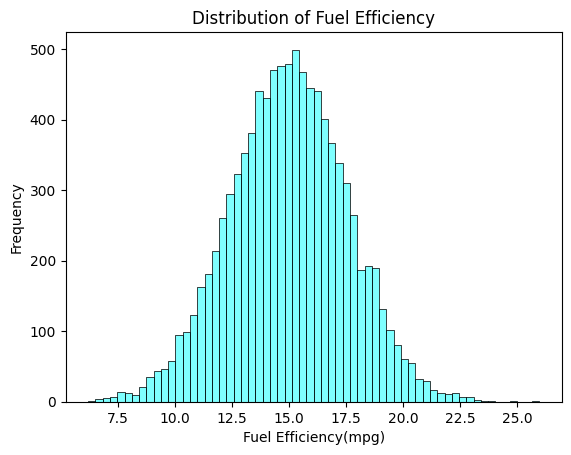

In [65]:
#Distribution of fuel Efficiency
sns.histplot(x='fuel_efficiency_mpg', data =df, color="cyan", alpha=0.5)
plt.xlabel("Fuel Efficiency(mpg)")
plt.ylabel("Frequency")
plt.title("Distribution of Fuel Efficiency")
plt.show()

From the histogram plotted, fuel efficiency doesn't seem to have a long tail but rather a normal distribution.

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [66]:
#Missing values
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

The `'horsepower'` has 708 missing values.

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [67]:
#median value for horsepower
horsepower_meadian = df.horsepower.median()
horsepower_meadian

np.float64(149.0)

The median for `'horsepower'` column is **149**.

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [107]:
#Set the random seed to 42
np.random.seed(42)

#Find the size of the dataset
n = len(df)

#Set the split indexes based on the size of the dataset for the train/val/test with a 60/20/20 distribution
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#Find the indexes
idx = np.arange(n)

#Randomly shuffle the indexes
np.random.shuffle(idx)

#shuffled dataset
df_shuffled = df.iloc[idx]

#Split the dataset to train/val/test
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [102]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2023 - df.model_year
    df = df.drop(["model_year"], axis=1)  # must reassign here
    X = df.fillna(0).values
    return X

In [103]:
#Train a linear regression model
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [104]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### a. Filling missing values with 0

In [105]:
#Create copies of the split datasets
df_train_1 = df_train.copy()
df_val_1 = df_val.copy()


y_train_orig = df_train_1.fuel_efficiency_mpg.values
y_val_orig = df_val_1.fuel_efficiency_mpg.values



del df_train_1 ['fuel_efficiency_mpg']
del df_val_1['fuel_efficiency_mpg']

#df_train_1['age'] = 2023 - df_train_1.model_year
#X_train = df_train_1.fillna(0)
#X_train = X_train.drop(['model_year'], axis=1)
X_train = prepare_X(df_train_1)


w_0, w = train_linear_regression(X_train, y_train_orig)
y_pred = w_0 + X_train.dot(w)
print('train_rmse', round(rmse(y_train_orig, y_pred),2))


#df_val_1['age'] = 2023 - df_val_1.model_year
#X_val = df_val_1.fillna(0)
#X_val = X_val.drop(['model_year'], axis=1)
X_val = prepare_X(df_val_1)
y_pred = w_0 + X_val.dot(w)
print('validation_rmse', round(rmse(y_val_orig, y_pred),2))

train_rmse 0.52
validation_rmse 0.52


#### b. Filling missing values with mean

In [73]:
#Create copies of the split datasets
df_train_2 = df_train.copy()
df_val_2 = df_val.copy()


y_train_orig = df_train_2.fuel_efficiency_mpg.values
y_val_orig = df_val_2.fuel_efficiency_mpg.values


del df_train_2 ['fuel_efficiency_mpg']
del df_val_2['fuel_efficiency_mpg']

df_train_2['age'] = 2023 - df_train_2.model_year
X_train = df_train_2.fillna(df_train_2['horsepower'].mean())
X_train = X_train.drop(['model_year'], axis=1)



w_0, w = train_linear_regression(X_train.values, y_train_orig)
y_pred = w_0 + X_train.dot(w)
print('train_rmse', round(rmse(y_train_orig, y_pred), 2))


df_val_2['age'] = 2023 - df_val_2.model_year
X_val = df_val_2.fillna(df_train_2['horsepower'].mean())
X_val = X_val.drop(['model_year'], axis=1).values

y_pred = w_0 + X_val.dot(w)
print('validation_rmse', round(rmse(y_val_orig, y_pred),2))

train_rmse 0.46
validation_rmse 0.46


Filling missing values with mean outputs a lower rmse of **0.46** on the validation set compared to that of **0.52** when filling missing values with zeros.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [106]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [109]:
#Create copies of the split datasets
df_train_1 = df_train.copy()
df_val_1 = df_val.copy()


y_train_orig = df_train_1.fuel_efficiency_mpg.values
y_val_orig = df_val_1.fuel_efficiency_mpg.values



del df_train_1 ['fuel_efficiency_mpg']
del df_val_1['fuel_efficiency_mpg']



X_train = prepare_X(df_train_1)
X_val = prepare_X(df_val_1)

for r  in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train_orig, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 12.51
  0.01 12.51
   0.1 12.51
     1 12.5
     5 12.46
    10 12.42
   100 12.15


An **r** value of **100** gives the best rmse of **12.15**.

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [112]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2023 - df.model_year
    df = df.drop(["model_year"], axis=1) 
    X = df.fillna(0).values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [114]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    np.random.seed(seed)
    
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.fuel_efficiency_mpg.values
    y_val_orig = df_val.fuel_efficiency_mpg.values

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    w_0, w = train_linear_regression(X_train, y_train_orig)
    
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val_orig, y_pred)
    rmse_scores.append(score)

# Compute standard deviation
std = np.std(rmse_scores)
print("Validation RMSE scores:", rmse_scores)
print("Standard deviation:", round(std, 3))

Validation RMSE scores: [np.float64(1.5225682062612196e-11), np.float64(6.352771722128519e-12), np.float64(3.4763546411650483e-12), np.float64(5.8229794597204974e-12), np.float64(7.553197143045781e-12), np.float64(7.320383282189684e-12), np.float64(5.675433583929159e-12), np.float64(5.004588801544447e-12), np.float64(1.3093606010115804e-12), np.float64(6.075394611174709e-12)]
Standard deviation: 0.0


the std is **0.00**

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [117]:
np.random.seed(9)

# split
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test  = df_shuffled.iloc[n_train+n_val:].copy()

# combine train + val
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# targets
y_full_train = df_full_train.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# features
df_full_train = df_full_train.drop(columns=['fuel_efficiency_mpg'])
df_test_X = df_test.drop(columns=['fuel_efficiency_mpg'])

X_full_train = prepare_X(df_full_train)
X_test = prepare_X(df_test_X)

# train with r=0.001
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# predict on test
y_pred = w_0 + X_test.dot(w)

# evaluate
test_rmse = rmse(y_test, y_pred)
print("Test RMSE:", round(test_rmse, 3))

Test RMSE: 0.516


The test rmse for seed = 9 and r=0.001 is **0.516**

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one